## Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\91798\Desktop\Data Science\Assignment given by companies\Kaatru IIT Madras\days.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
num_col=df.describe().T.index

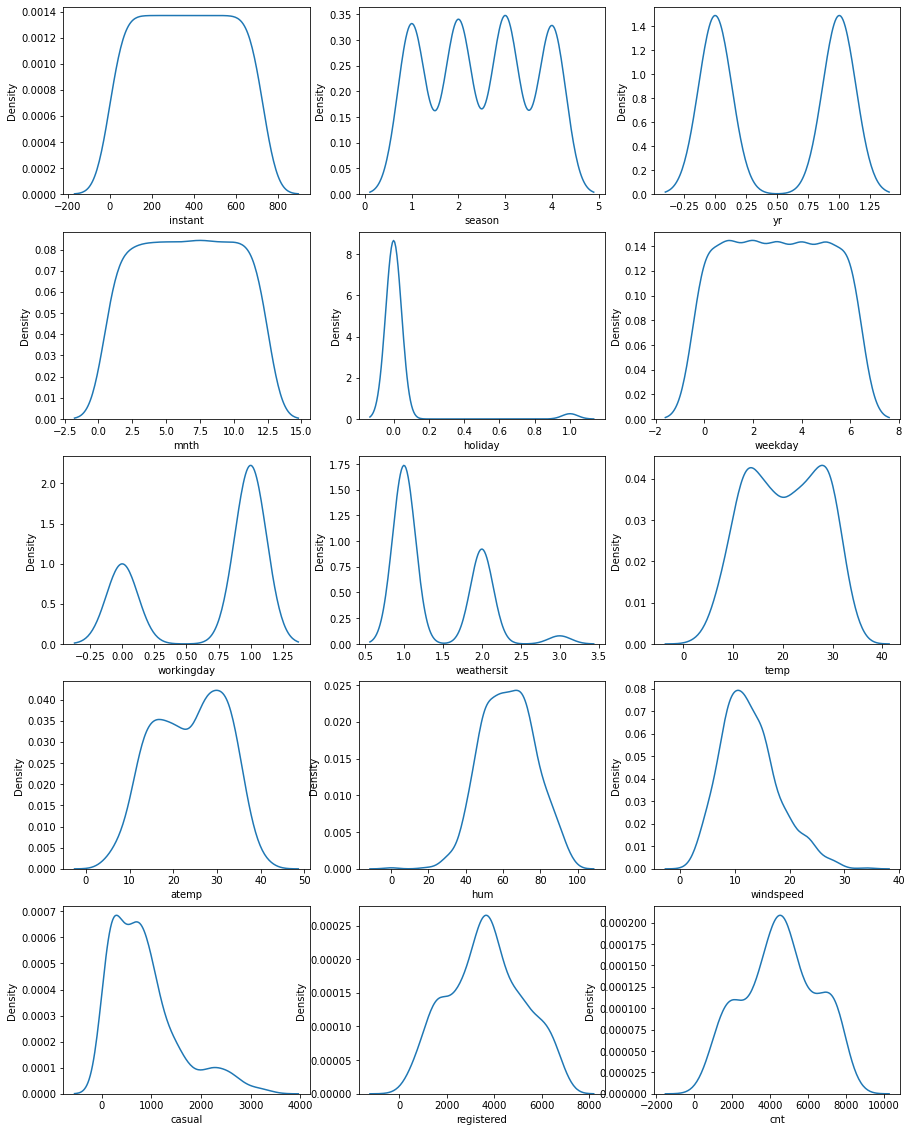

In [8]:
plt.figure(figsize=(15,20))

for i,j in enumerate(num_col):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[j])

In [9]:
for i,j in enumerate(num_col):
    print(df[j].value_counts())
    print("**************************************************************************")

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64
**************************************************************************
3    188
2    184
1    180
4    178
Name: season, dtype: int64
**************************************************************************
0    365
1    365
Name: yr, dtype: int64
**************************************************************************
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
**************************************************************************
0    709
1     21
Name: holiday, dtype: int64
**************************************************************************
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
**************************************************************************
1    504
0    226
Name: workingday, 

### Independent Variables
Continous Variables
+ temp
+ atemp
+ windspeed
+ hum
+ casual
+ registered

Discrete variables
+ Season
+ yr
+ month
+ holiday
+ weekday
+ workingday
+ weathersit

In [10]:
# Deleted "instant" column since it is of no use
df.drop(columns="instant",inplace=True)

In [11]:
# Changing "dteday" column object to datetime datatype
df["dteday"]=df.dteday.astype("datetime64[ns]",)

In [12]:
df.dtypes

dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Removing Outliers 

In [13]:
def Out_rem(column):
    Q3=df[column].quantile(q=0.75)
    Q1=df[column].quantile(q=0.25)
    IQR=Q3-Q1
    max_lmt=Q3+1.5*(IQR)
    min_lmt=Q1-1.5*(IQR)
    out_idx=df[(df[column]>max_lmt) | (df[column]<min_lmt)].index
    print(df[column].name)
    print(Q3,"-",Q1,"=",IQR)
    print(max_lmt)
    print(min_lmt)
    print(out_idx)
    df.drop(labels=(out_idx),axis=0,inplace=True)
    sns.kdeplot(df[column])
    plt.show()
    sns.boxplot(df[column])
    plt.show()

casual
1096.5 - 316.25 = 780.25
2266.875
-854.125
Int64Index([148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469,
            475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532,
            538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630,
            636, 643, 657, 664, 679],
           dtype='int64')


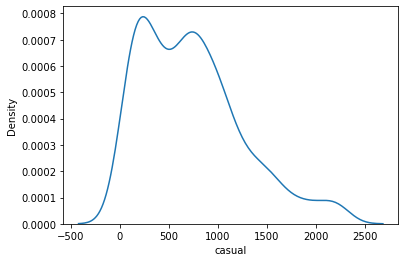

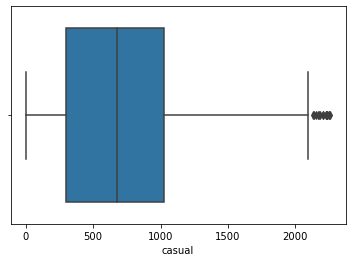

In [14]:
Out_rem("casual")

windspeed
15.68846875 - 9.041717 = 6.64675175
25.658596375000002
-0.9284106249999997
Int64Index([44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720], dtype='int64')


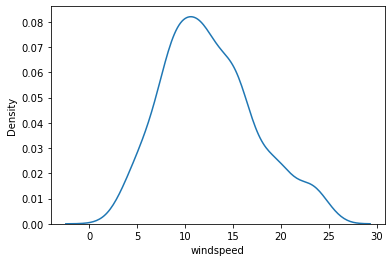

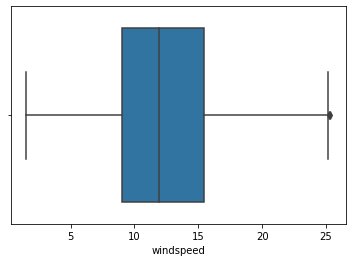

In [15]:
Out_rem("windspeed")

## Uni-Varient Analysis

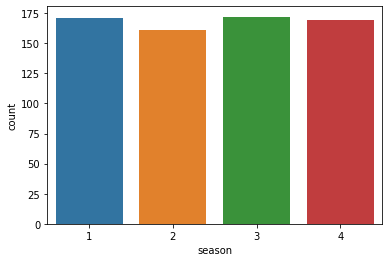

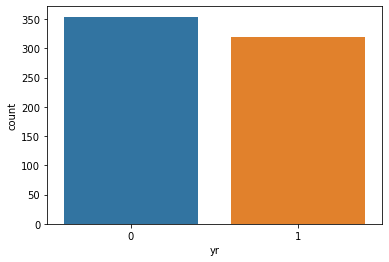

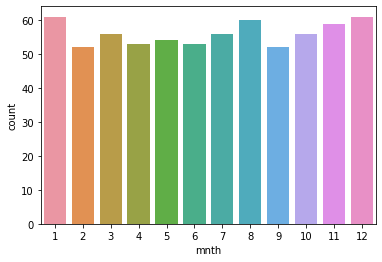

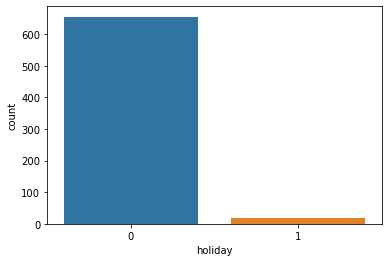

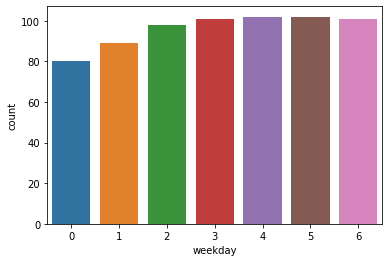

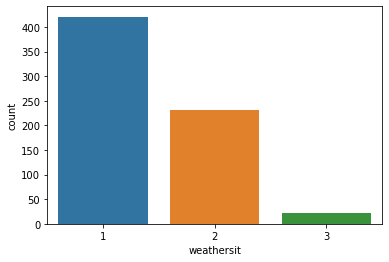

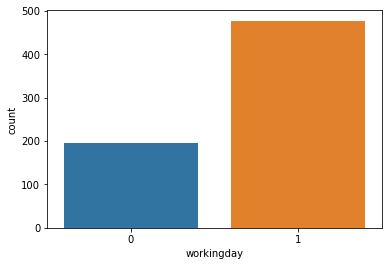

In [16]:
decrete_col=["season","yr","mnth","holiday","weekday","weathersit","workingday"]
for i in decrete_col:
    sns.countplot(df[i])
    plt.show()

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

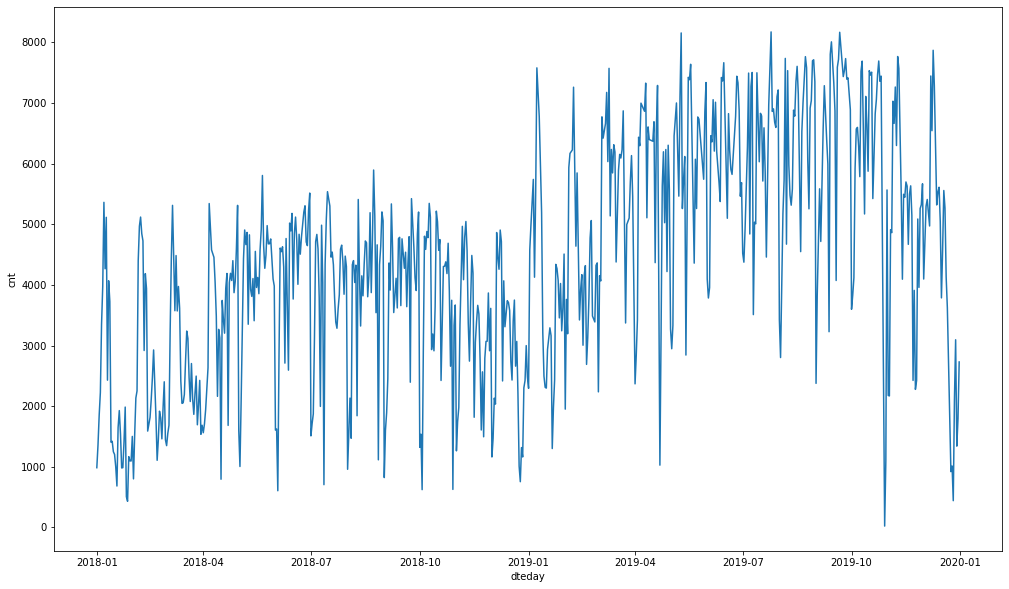

In [17]:
plt.figure(figsize=(17,10))
sns.lineplot(x="dteday",y="cnt",data=df)

### We can clearly see that 2019 has higher no. of count in shared bikes than 2018

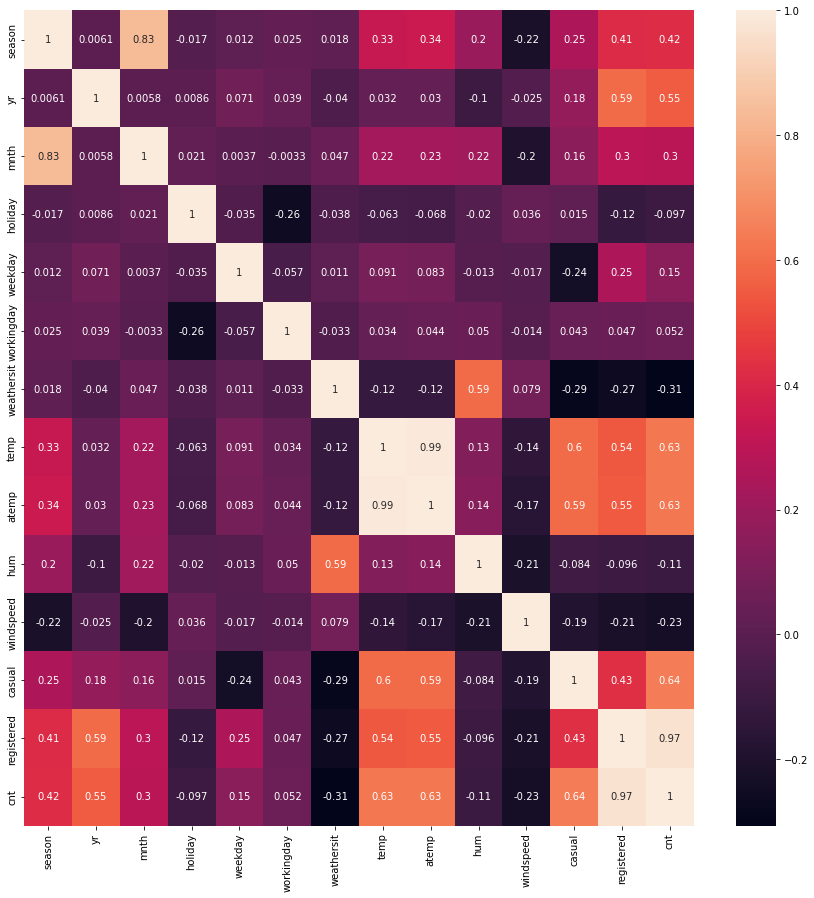

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In this Heatmap, we can see that there is huge Multi-Colinearity between all the columns
+ registered-Season : 0.83
+ registered-yr: 0.59
+ registered-temp: 0.54
+ registered-atemp: 0.55
+ registered-casual: 0.43
+ casual-temp: 0.6
+ casual-atemp: 0.59
+ hum-weathersit: 0.59
+ temp-atemp: 0.99
+ mnth-season: 0.83 
### We have to delete columns accordingly!!! 

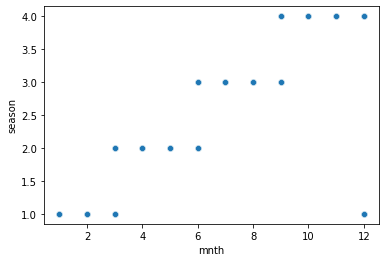

In [19]:
sns.scatterplot(x="mnth",y="season",data=df)
plt.show()

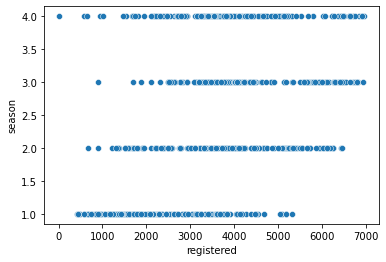

In [20]:
sns.scatterplot(x="registered",y="season",data=df)
plt.show()

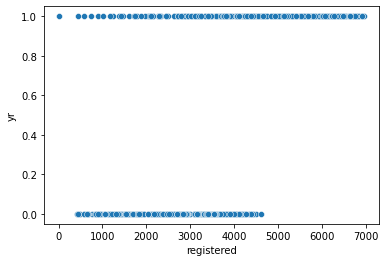

In [21]:
sns.scatterplot(x="registered",y="yr",data=df)
plt.show()

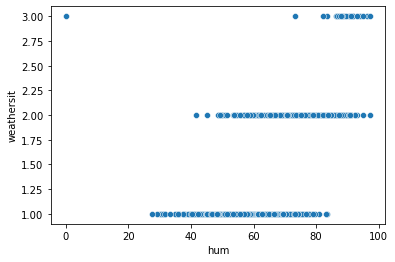

In [22]:
sns.scatterplot(x="hum",y="weathersit",data=df)
plt.show()

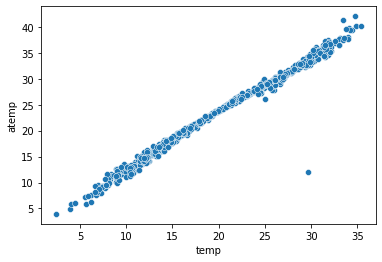

In [23]:
sns.scatterplot(x="temp",y="atemp",data=df)
plt.show()

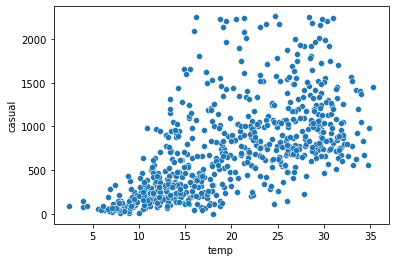

In [24]:
sns.scatterplot(x="temp",y="casual",data=df)
plt.show()

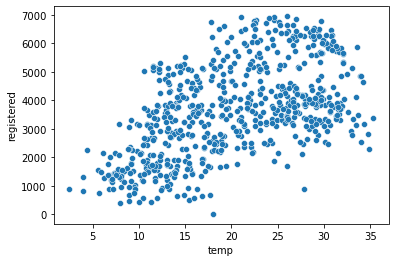

In [25]:
sns.scatterplot(x="temp",y="registered",data=df)
plt.show()

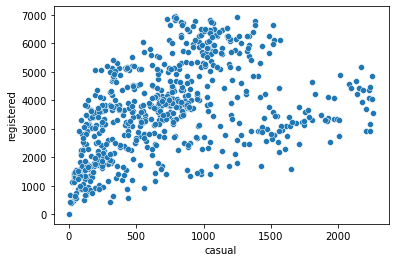

In [26]:
sns.scatterplot(x="casual",y="registered",data=df)
plt.show()

### Deleting Columns having Multi-colinearity

In [27]:
df.drop(labels="registered",axis=1,inplace=True) #Multi-correlated with multiple columns 
df.drop(labels="casual",axis=1,inplace=True) #Multi-correlated with multiple columns
df.drop(labels="hum",axis=1,inplace=True) #Highly Correlated with weathersit
df.drop(labels="atemp",axis=1,inplace=True) #Highly Correlated with temp 
df.drop(labels="dteday",axis=1,inplace=True) #Can't give datetime datatype to algorithms (Only numerical*) 
df.drop(labels="mnth",axis=1,inplace=True) #Highly Multi-correlated with season
# df.drop(labels="season",axis=1,inplace=True)
# df.drop(labels="temp",axis=1,inplace=True)

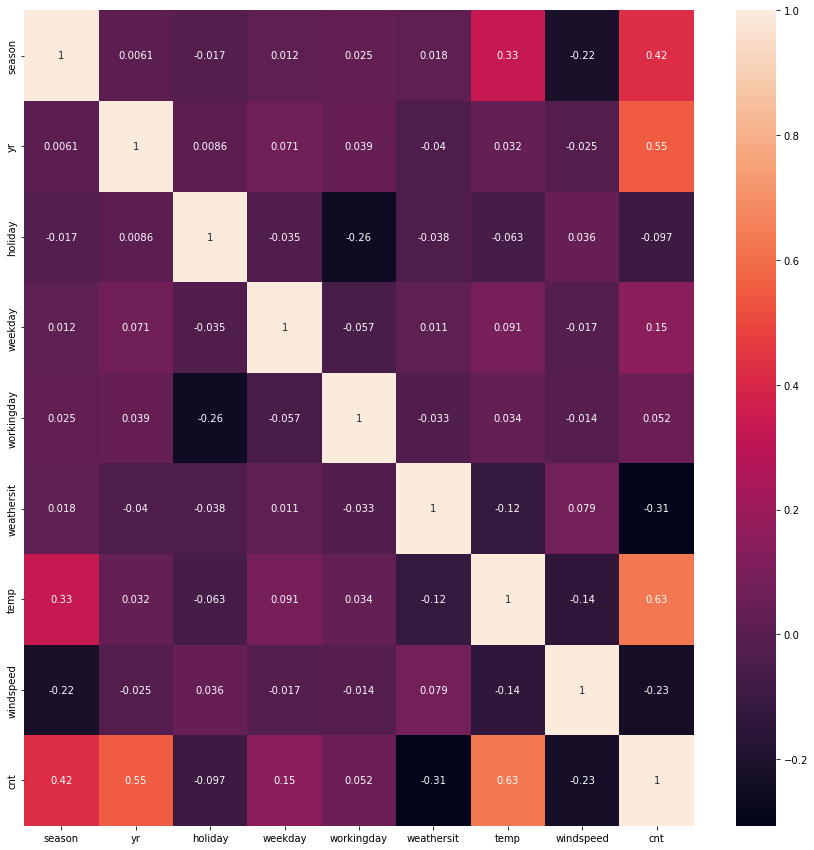

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Delecting columns witn low correlation wrt dependent variable

In [29]:
df.drop(labels="holiday",axis=1,inplace=True)
df.drop(labels="weekday",axis=1,inplace=True)
df.drop(labels="workingday",axis=1,inplace=True)
df.drop(labels="windspeed",axis=1,inplace=True)

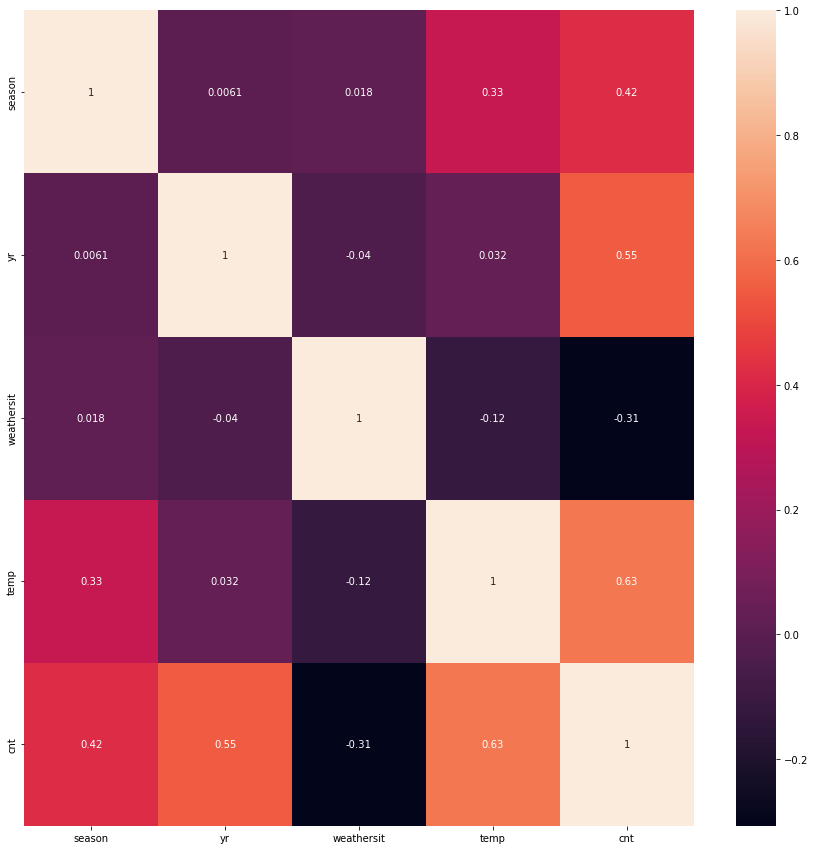

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [31]:
df.columns

Index(['season', 'yr', 'weathersit', 'temp', 'cnt'], dtype='object')

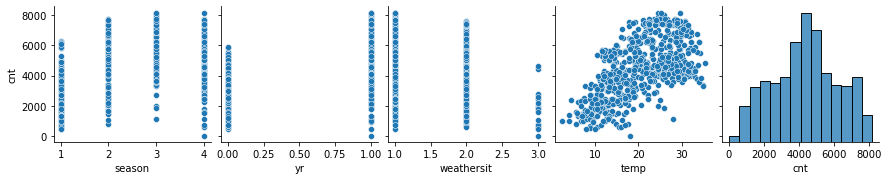

In [32]:
sns.pairplot(data = df,
            x_vars = df.columns,
            y_vars = 'cnt')
plt.show()

In [33]:
X=df[["temp","yr","weathersit","season"]]

In [34]:
y=df.cnt

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [36]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(504, 4) (504,)
(169, 4) (169,)


# LinearRegression with all Features

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [38]:
y_train_pred = regressor.predict(X_train)

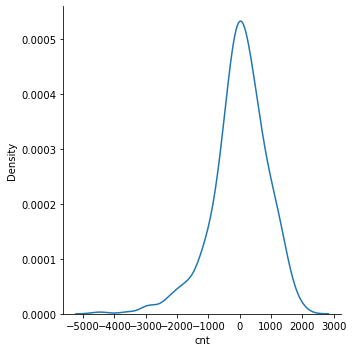

In [39]:
#Residual Analysis on Training Data

residual_lr = y_train - y_train_pred

sns.displot(residual_lr, kind='kde')

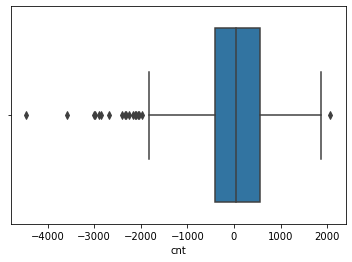

In [40]:
sns.boxplot(residual_lr)
plt.show()

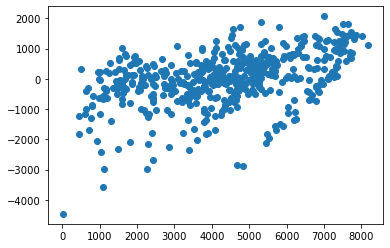

In [41]:
plt.scatter(y_train, residual_lr)

plt.show()

In [42]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

Mean Absolute Error:  651.7160907660148
Mean Squared Error:  777063.3826926375
Root Mean Squared Error:  881.511986698217


In [43]:
print(metrics.r2_score(y_train, y_train_pred))

0.7852806198231141


In [44]:
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.7835594223868265


In [45]:
y_test_pred = regressor.predict(X_test)

In [46]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  635.8170232723431
Mean Squared Error:  694013.5746240257
Root Mean Squared Error:  833.0747713284959


In [47]:
print(metrics.r2_score(y_test, y_test_pred))

0.7713356736732625


In [48]:
r2 = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print(r2_adj)

0.7657584949823665


In [49]:
def Forw_Prop(X_train,y_train,X_test,y_test): 
    print(X_train.columns)
    print("--------------------------------------------------------------------------------")
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_train_pred = regressor.predict(X_train)
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))
    print("r2_score:",metrics.r2_score(y_train, y_train_pred))
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)
    k = X_test.shape[1]
    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    print("Adj_r2_score:",r2_adj)
    print("--------------------------------------------------------------------------------")
    y_test_pred = regressor.predict(X_test)
    print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
    print("r2_score:",metrics.r2_score(y_test, y_test_pred))
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_test)
    k = X_test.shape[1]
    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    print("Adj_r2_score:",r2_adj)

In [50]:
Forw_Prop(X_train,y_train,X_test,y_test)

Index(['temp', 'yr', 'weathersit', 'season'], dtype='object')
--------------------------------------------------------------------------------
Mean Absolute Error:  651.7160907660148
r2_score: 0.7852806198231141
Adj_r2_score: 0.7835594223868265
--------------------------------------------------------------------------------
Mean Absolute Error:  635.8170232723431
r2_score: 0.7713356736732625
Adj_r2_score: 0.7657584949823665


In [51]:
X_train_WS=X_train[['temp', 'yr', 'weathersit']]
X_test_WS=X_test[['temp', 'yr', 'weathersit']]
Forw_Prop(X_train_WS,y_train,X_test_WS,y_test)

Index(['temp', 'yr', 'weathersit'], dtype='object')
--------------------------------------------------------------------------------
Mean Absolute Error:  783.986761987118
r2_score: 0.7307367705812642
Adj_r2_score: 0.7291211912047517
--------------------------------------------------------------------------------
Mean Absolute Error:  766.8720667713676
r2_score: 0.7033540057228164
Adj_r2_score: 0.6979604421905039


In [52]:
X_train_SS=X_train[['temp', 'yr', 'season']]
X_test_SS=X_test[['temp', 'yr', 'season']]
Forw_Prop(X_train_SS,y_train,X_test_SS,y_test)

Index(['temp', 'yr', 'season'], dtype='object')
--------------------------------------------------------------------------------
Mean Absolute Error:  733.9736942983358
r2_score: 0.7319156597141308
Adj_r2_score: 0.7303071536724155
--------------------------------------------------------------------------------
Mean Absolute Error:  712.859178992765
r2_score: 0.7232046067103713
Adj_r2_score: 0.7181719631960144


### We can clearly see that 'temp', 'yr' and 'season' variables are significant in the demand for shared bikes with the available independent variables (cnt) for Linear Regression

## But Let see for other Algorithms!!!

# Modelling (weathersit)

In [53]:
X_train_WS.head()

,temp,yr,weathersit
268,26.615847,0,2
384,8.917500,1,2
592,29.485847,1,1
144,27.094153,0,1
243,26.855000,0,1


In [54]:
X_train_num = X_train_WS[["temp"]]

X_train_num.head()

,temp
268,26.615847
384,8.917500
592,29.485847
144,27.094153
243,26.855000


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,temp
268,0.877351
384,-1.408222
592,1.247984
144,0.939119
243,0.908235


In [56]:
X_train_discrete = X_train_WS[['yr','weathersit']]

X_train_discrete.head()

,yr,weathersit
268,0,2
384,1,2
592,1,1
144,0,1
243,0,1


In [57]:
X_train_transformed = pd.concat([X_train_discrete,X_train_num_rescaled], axis=1)

X_train_transformed.head()

,yr,weathersit,temp
268,0,2,0.877351
384,1,2,-1.408222
592,1,1,1.247984
144,0,1,0.939119
243,0,1,0.908235


In [58]:
X_test_num = X_test_WS[["temp"]]

X_test_num.head()

,temp
257,23.677500
109,24.395000
56,11.582500
415,11.480000
501,24.326653


In [59]:
X_test_num_rescaled = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,temp
257,0.408775
109,0.510886
56,-1.312527
415,-1.327114
501,0.501160


In [60]:
X_test_discrete = X_test_WS[['yr','weathersit']]

X_test_discrete.head()

,yr,weathersit
257,0,2
109,0,1
56,0,1
415,1,1
501,1,1


In [61]:
X_test_transformed = pd.concat([X_test_discrete,X_test_num_rescaled], axis=1)

X_test_transformed.head()

,yr,weathersit,temp
257,0,2,0.408775
109,0,1,0.510886
56,0,1,-1.312527
415,1,1,-1.327114
501,1,1,0.501160


## LinearRegression

In [62]:
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [63]:
y_train_pred = regressor.predict(X_train_transformed)

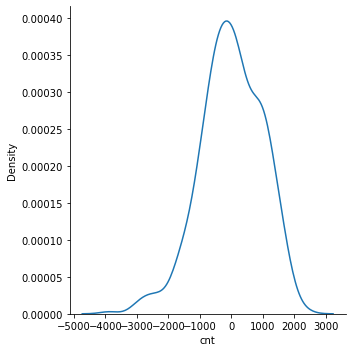

In [64]:
#Residual Analysis on Training Data

residual_lr = y_train - y_train_pred

sns.displot(residual_lr, kind='kde')

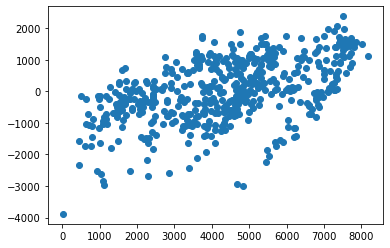

In [65]:
plt.scatter(y_train, residual_lr)

plt.show()

In [66]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))
print('r2_score: ',metrics.r2_score(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('Adj_r2_score: ',r2_adj)

Mean Absolute Error:  783.986761987118
r2_score:  0.7307367705812642
Adj_r2_score:  0.7285783479005529


In [67]:
y_test_pred = regressor.predict(X_test_transformed)

In [68]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('r2_score: ',metrics.r2_score(y_test, y_test_pred))
r2_lr_ws = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2_lr_ws)*(n-1)/(n-k-1)

print('Adj_r2_score: ',r2_adj)

Mean Absolute Error:  775.6892089394431
r2_score:  0.6931158239663019
Adj_r2_score:  0.685630844063041


# KNeighborsRegressor

In [69]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsRegressor(), 
    param_distributions=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [70]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
best_estimator_knn= clf.best_estimator_
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))
r2_ws_knn=clf.score(X_test_transformed, y_test)

Best parameters set found on train set
{'p': 2, 'n_neighbors': 15}
KNeighborsRegressor(n_neighbors=15)

Score on Test Data:  0.7637681227875063


# DecisionTreeRegressor

In [71]:
from sklearn.tree import DecisionTreeRegressor
tuned_parameters = [{'max_depth': [i for i in range(1,21)]}]

clf = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_distributions=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19,
                                                       20]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [72]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
best_estimator_DT=clf.best_estimator_
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))
r2_ws_DT=clf.score(X_test_transformed, y_test)

Best parameters set found on train set
{'max_depth': 6}
DecisionTreeRegressor(max_depth=6)

Score on Test Data:  0.7265329513078906


# RandomForestRegressor

In [73]:
from sklearn.ensemble import RandomForestRegressor

n_folds = 5

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestRegressor()

# fit tree on training data
tunned_model_rf = RandomizedSearchCV(
                      estimator=rf, 
                      param_distributions=hyper_parameters,
                      cv=n_folds, 
                      scoring="r2",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_depth': range(2, 20, 5)}],
                   return_train_score=True, scoring='r2', verbose=1)

In [74]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
best_estimator_rf=tunned_model_rf.best_estimator_
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))
r2_ws_RF=tunned_model_rf.score(X_test_transformed, y_test)

Best parameters set found on train set
{'max_depth': 7}
RandomForestRegressor(max_depth=7)

Score on Test Data:  0.7254561655765854


# Modelling (season)

In [75]:
X_train_SS.head()

,temp,yr,season
268,26.615847,0,4
384,8.917500,1,1
592,29.485847,1,3
144,27.094153,0,2
243,26.855000,0,3


In [76]:
X_train_num = X_train_SS[["temp"]]

X_train_num.head()

,temp
268,26.615847
384,8.917500
592,29.485847
144,27.094153
243,26.855000


In [77]:
scaler = StandardScaler()
X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,temp
268,0.877351
384,-1.408222
592,1.247984
144,0.939119
243,0.908235


In [78]:
X_train_discrete = X_train_SS[['yr','season']]

X_train_discrete.head()

,yr,season
268,0,4
384,1,1
592,1,3
144,0,2
243,0,3


In [79]:
X_train_transformed = pd.concat([X_train_discrete,X_train_num_rescaled], axis=1)

X_train_transformed.head()

,yr,season,temp
268,0,4,0.877351
384,1,1,-1.408222
592,1,3,1.247984
144,0,2,0.939119
243,0,3,0.908235


In [80]:
X_test_num = X_test_SS[["temp"]]

X_test_num.head()

,temp
257,23.677500
109,24.395000
56,11.582500
415,11.480000
501,24.326653


In [81]:
X_test_num_rescaled = pd.DataFrame(scaler.fit_transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,temp
257,0.408775
109,0.510886
56,-1.312527
415,-1.327114
501,0.501160


In [82]:
X_test_discrete = X_test_SS[['yr','season']]

X_test_discrete.head()

,yr,season
257,0,3
109,0,2
56,0,1
415,1,1
501,1,2


In [83]:
X_test_transformed = pd.concat([X_test_discrete,X_test_num_rescaled], axis=1)

X_test_transformed.head()

,yr,season,temp
257,0,3,0.408775
109,0,2,0.510886
56,0,1,-1.312527
415,1,1,-1.327114
501,1,2,0.501160


## LinearRegression

In [84]:
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [85]:
y_train_pred = regressor.predict(X_train_transformed)

In [86]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_train, y_train_pred))
print('r2_score: ',metrics.r2_score(y_train, y_train_pred))
r2 = metrics.r2_score(y_train, y_train_pred)
n = len(y_train)
k = X_test.shape[1]

r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)

print('Adj_r2_score: ',r2_adj)

Mean Absolute Error:  733.9736942983358
r2_score:  0.7319156597141308
Adj_r2_score:  0.7297666870465085


In [87]:
y_test_pred = regressor.predict(X_test_transformed)

In [88]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('r2_score: ',metrics.r2_score(y_test, y_test_pred))
r2_lr_ss = metrics.r2_score(y_test, y_test_pred)
n = len(y_test)
k = X_test.shape[1]

r2_adj = 1 - (1-r2_lr_ws)*(n-1)/(n-k-1)

print('Adj_r2_score: ',r2_adj)

Mean Absolute Error:  770.2944121200541
r2_score:  0.7045066146413408
Adj_r2_score:  0.685630844063041


## KNeighborsRegressor

In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
tuned_parameters = [{'n_neighbors': [i for i in range(1, 51)], 
                     'p': [1, 2, 3]}]

clf = RandomizedSearchCV(
    estimator=KNeighborsRegressor(), 
    param_distributions=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...],
                                         'p': [1, 2, 3]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [90]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
best_estimator_knn= clf.best_estimator_
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))
r2_ss_knn=clf.score(X_test_transformed, y_test)

Best parameters set found on train set
{'p': 2, 'n_neighbors': 16}
KNeighborsRegressor(n_neighbors=16)

Score on Test Data:  0.7613308097026106


## DecisionTreeRegressor

In [91]:
tuned_parameters = [{'max_depth': [i for i in range(1,21)]}]

clf = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(), 
    param_distributions=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
clf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                       9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19,
                                                       20]}],
                   return_train_score=True, scoring='r2', verbose=1)

In [92]:
print("Best parameters set found on train set")
print(clf.best_params_)
print(clf.best_estimator_)
best_estimator_DT=clf.best_estimator_
print()

print('Score on Test Data: ', clf.score(X_test_transformed, y_test))
r2_ss_DT=clf.score(X_test_transformed, y_test)

Best parameters set found on train set
{'max_depth': 4}
DecisionTreeRegressor(max_depth=4)

Score on Test Data:  0.6715615135645314


## RandomForestRegressor

In [93]:
n_folds = 5

hyper_parameters = [{'max_depth': range(2, 20, 5)}]

rf = RandomForestRegressor()

# fit tree on training data
tunned_model_rf = RandomizedSearchCV(
                      estimator=rf, 
                      param_distributions=hyper_parameters,
                      cv=n_folds, 
                      scoring="r2",
                      return_train_score=True,
                      verbose=1
)

tunned_model_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_depth': range(2, 20, 5)}],
                   return_train_score=True, scoring='r2', verbose=1)

In [94]:
print("Best parameters set found on train set")
print(tunned_model_rf.best_params_)
print(tunned_model_rf.best_estimator_)
best_estimator_rf=tunned_model_rf.best_estimator_
print()

print('Score on Test Data: ', tunned_model_rf.score(X_test_transformed, y_test))
r2_ss_RF=tunned_model_rf.score(X_test_transformed, y_test)

Best parameters set found on train set
{'max_depth': 7}
RandomForestRegressor(max_depth=7)

Score on Test Data:  0.6999449538655622


## Comparision of two variables Season VS Weathersit

In [95]:
best_var={"ALgorithms":["Linear Regression","KNN","Decision Tree","Random Forest"],"Season":[r2_lr_ss,r2_ss_knn,r2_ss_DT,r2_ss_RF],"Weathersit":[r2_lr_ws,r2_ws_knn,r2_ws_DT,r2_ws_RF]}
best_var

{'ALgorithms': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest'],
 'Season': [0.7045066146413408,
  0.7613308097026106,
  0.6715615135645314,
  0.6999449538655622],
 'Weathersit': [0.6931158239663019,
  0.7637681227875063,
  0.7265329513078906,
  0.7254561655765854]}

In [96]:
df_1=pd.DataFrame(best_var)
df_1

,ALgorithms,Season,Weathersit
0,Linear Regression,0.704507,0.693116
1,KNN,0.761331,0.763768
2,Decision Tree,0.671562,0.726533
3,Random Forest,0.699945,0.725456
